# Simulación TP4: Curva de Calentamiento Con y Sin Pérdidas

En este notebook, graficaremos la temperatura del fluido dentro del calentador sin pérdidas y con pérdidas para cada tick de tiempo, hasta llegar a la temperatura objetivo.

Además, añadiremos un tercer escenario donde a los 50 segundos se agregan 4 cubitos de hielo de 10 gramos cada uno.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

## Parámetros del Calentador

In [20]:
# Parámetros geométricos (del TP3)
DIAMETRO = 8.0  # cm
ALTURA = 15.0   # cm
RADIO = DIAMETRO / 2  # cm
VOLUMEN = pi * (RADIO**2) * ALTURA  # cm^3
CAPACIDAD = VOLUMEN / 1000  # litros

# Parámetros del aislante (del TP3)
ESPESOR_AISLANTE = 0.25  # cm
COEF_CONDUCTIVIDAD_TERMICA = 0.04  # W/(m·K) - Fibra de vidrio

# Parámetros eléctricos (del TP1 y TP2)
VOLTAJE = 12.0  # V
RESISTENCIA = 0.23  # Ohms
POTENCIA = VOLTAJE**2 / RESISTENCIA  # W

# Parámetros del fluido (del TP2)
DENSIDAD_AGUA = 1.0  # kg/L
MASA_AGUA = CAPACIDAD * DENSIDAD_AGUA  # kg
CALOR_ESPECIFICO_AGUA = 4180  # J/(kg·°C)
TEMP_INICIAL = 20.0  # °C
TEMP_AMBIENTE = 20.0  # °C
TEMP_OBJETIVO = 80.0  # °C

# Parámetros del hielo
MASA_HIELO = 0.04  # kg (4 cubitos de 10g cada uno)
TEMP_HIELO = 0.0  # °C
CALOR_LATENTE_FUSION = 334000  # J/kg
TIEMPO_ADICION_HIELO = 50  # segundos

# Tiempo y discretización
TIEMPO_TOTAL = 450  # segundos (reducido para el nuevo escenario)
INTERVALO = 5  # segundos

## Cálculo de Pérdida de Calor (del TP3)

In [21]:
# Conversión a metros para los cálculos
RADIO_M = RADIO / 100  # m
ALTURA_M = ALTURA / 100  # m
ESPESOR_M = ESPESOR_AISLANTE / 100  # m

# Cálculo de la superficie
SUP_LATERAL = 2 * pi * RADIO_M * ALTURA_M  # m^2
SUP_BASES = 2 * pi * RADIO_M**2  # m^2
SUP_TOTAL = SUP_LATERAL + SUP_BASES  # m^2

# Cálculo del coeficiente de pérdida de calor
PERDIDA_CALOR = COEF_CONDUCTIVIDAD_TERMICA * SUP_TOTAL / ESPESOR_M  # W/K

# Mostrar resultados y parámetros
print("--- Parámetros del Calentador ---")
print(f"Diámetro: {DIAMETRO} cm")
print(f"Altura: {ALTURA} cm")
print(f"Capacidad: {CAPACIDAD:.2f} litros")
print(f"Masa del agua: {MASA_AGUA:.2f} kg")

print("\n--- Parámetros Eléctricos ---")
print(f"Voltaje: {VOLTAJE} V")
print(f"Resistencia: {RESISTENCIA} Ω")
print(f"Potencia Calculada: {POTENCIA:.2f} W")

print("\n--- Pérdida de Calor ---")
print(f"Superficie total: {SUP_TOTAL:.6f} m²")
print(f"Coeficiente de pérdida de calor: {PERDIDA_CALOR:.3f} W/K")

print("\n--- Parámetros de Hielo ---")
print(f"Masa total de hielo: {MASA_HIELO*1000:.0f} g (4 cubitos de 10g)")
print(f"Temperatura inicial del hielo: {TEMP_HIELO} °C")
print(f"Calor latente de fusión: {CALOR_LATENTE_FUSION} J/kg")
print(f"Tiempo de adición del hielo: {TIEMPO_ADICION_HIELO} segundos")

--- Parámetros del Calentador ---
Diámetro: 8.0 cm
Altura: 15.0 cm
Capacidad: 0.75 litros
Masa del agua: 0.75 kg

--- Parámetros Eléctricos ---
Voltaje: 12.0 V
Resistencia: 0.23 Ω
Potencia Calculada: 626.09 W

--- Pérdida de Calor ---
Superficie total: 0.047752 m²
Coeficiente de pérdida de calor: 0.764 W/K

--- Parámetros de Hielo ---
Masa total de hielo: 40 g (4 cubitos de 10g)
Temperatura inicial del hielo: 0.0 °C
Calor latente de fusión: 334000 J/kg
Tiempo de adición del hielo: 50 segundos


## Simulación de la Curva de Calentamiento

In [22]:
# Crear arreglo de tiempo con intervalos definidos
tiempo = np.arange(0, TIEMPO_TOTAL + 1, INTERVALO)

# Listas para almacenar las temperaturas
temperaturas_sin_perdidas = []
temperaturas_con_perdidas = []
temperaturas_con_hielo = []    # Nueva lista para el escenario con hielo

# Cálculo teórico sin pérdidas
for t in tiempo:
    # Temperatura en función del tiempo sin pérdidas
    # T(t) = T₀ + (P × t)/(m × c)
    temperatura = TEMP_INICIAL + (POTENCIA * t) / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
    temperaturas_sin_perdidas.append(temperatura)

# Cálculo con pérdidas - simulación iterativa
temperatura_actual = TEMP_INICIAL
for t in np.arange(0, TIEMPO_TOTAL + 1, INTERVALO):
    # Guardamos temperatura actual
    temperaturas_con_perdidas.append(temperatura_actual)
    
    # Calculamos para el siguiente intervalo
    # Pérdida de calor proporcional a la diferencia de temperatura
    perdida_w = PERDIDA_CALOR * (temperatura_actual - TEMP_AMBIENTE)
    
    # Potencia efectiva = Potencia total - Pérdidas
    potencia_efectiva = POTENCIA - perdida_w
    
    # Incremento de temperatura en este intervalo
    delta_t = (potencia_efectiva * INTERVALO) / (MASA_AGUA * CALOR_ESPECIFICO_AGUA)
    
    # Nueva temperatura
    temperatura_actual = temperatura_actual + delta_t

# Cálculo con pérdidas + hielo a los 50 segundos
temperatura_actual = TEMP_INICIAL
masa_actual = MASA_AGUA
for i, t in enumerate(np.arange(0, TIEMPO_TOTAL + 1, INTERVALO)):
    # Guardamos temperatura actual
    temperaturas_con_hielo.append(temperatura_actual)
    
    # Verificamos si es el momento de agregar el hielo
    if t == TIEMPO_ADICION_HIELO:
        # Paso 1: Energía para derretir el hielo
        energia_fusion = MASA_HIELO * CALOR_LATENTE_FUSION
        
        # Paso 2: Energía para llevar el agua resultante a la temperatura actual
        energia_calentamiento = MASA_HIELO * CALOR_ESPECIFICO_AGUA * (temperatura_actual - TEMP_HIELO)
        
        # Paso 3: Energía total necesaria
        energia_total = energia_fusion + energia_calentamiento
        
        # Paso 4: Calcular caída de temperatura
        caida_temperatura = energia_total / (masa_actual * CALOR_ESPECIFICO_AGUA)
        
        # Paso 5: Actualizar temperatura y masa
        temperatura_actual -= caida_temperatura
        masa_actual += MASA_HIELO
        
        print(f"\n--- Adición de Hielo en t={t}s ---")
        print(f"Temperatura antes de agregar hielo: {temperatura_actual + caida_temperatura:.2f}°C")
        print(f"Caída de temperatura: {caida_temperatura:.2f}°C")
        print(f"Temperatura después de agregar hielo: {temperatura_actual:.2f}°C")
        print(f"Nueva masa de agua: {masa_actual:.3f} kg")
    
    # Calculamos para el siguiente intervalo
    # Pérdida de calor proporcional a la diferencia de temperatura
    perdida_w = PERDIDA_CALOR * (temperatura_actual - TEMP_AMBIENTE)
    
    # Potencia efectiva = Potencia total - Pérdidas
    potencia_efectiva = POTENCIA - perdida_w
    
    # Incremento de temperatura en este intervalo (con masa actualizada)
    delta_t = (potencia_efectiva * INTERVALO) / (masa_actual * CALOR_ESPECIFICO_AGUA)
    
    # Nueva temperatura
    temperatura_actual = temperatura_actual + delta_t

# Convertir listas a arrays de NumPy
temperaturas_sin_perdidas = np.array(temperaturas_sin_perdidas)
temperaturas_con_perdidas = np.array(temperaturas_con_perdidas)
temperaturas_con_hielo = np.array(temperaturas_con_hielo)


--- Adición de Hielo en t=50s ---
Temperatura antes de agregar hielo: 29.88°C
Caída de temperatura: 5.82°C
Temperatura después de agregar hielo: 24.05°C
Nueva masa de agua: 0.794 kg


## Tabla de resultados cada 10 segundos

In [23]:
# Imprimir las temperaturas cada 10 segundos
print("\n--- Resultados de la Simulación ---")
print("Tiempo (s) | Sin Pérdidas (°C) | Con Pérdidas (°C) | Con Hielo (°C)")
print("----------|-------------------|-------------------|-------------")
for i, t in enumerate(tiempo):
    if i % 2 == 0:  # Cada 10 segundos
        print(f"{t:9d} | {temperaturas_sin_perdidas[i]:17.2f} | {temperaturas_con_perdidas[i]:17.2f} | {temperaturas_con_hielo[i]:13.2f}")


--- Resultados de la Simulación ---
Tiempo (s) | Sin Pérdidas (°C) | Con Pérdidas (°C) | Con Hielo (°C)
----------|-------------------|-------------------|-------------
        0 |             20.00 |             20.00 |         20.00
       10 |             21.99 |             21.99 |         21.99
       20 |             23.97 |             23.97 |         23.97
       30 |             25.96 |             25.94 |         25.94
       40 |             27.95 |             27.91 |         27.91
       50 |             29.93 |             29.88 |         29.88
       60 |             31.92 |             31.84 |         25.93
       70 |             33.91 |             33.80 |         27.80
       80 |             35.89 |             35.75 |         29.67
       90 |             37.88 |             37.70 |         31.53
      100 |             39.87 |             39.64 |         33.39
      110 |             41.85 |             41.58 |         35.25
      120 |             43.84 |       

## Gráfico de la Curva de Calentamiento

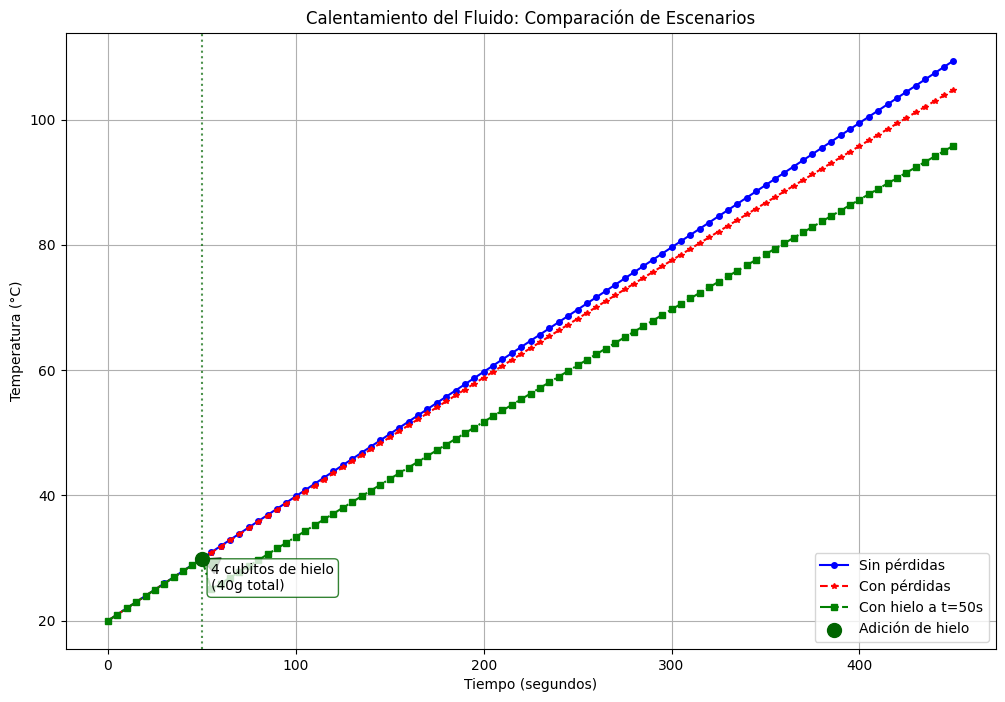

In [24]:
# Crear la gráfica
plt.figure(figsize=(12, 8))

# Gráficos de línea
plt.plot(tiempo, temperaturas_sin_perdidas, 'b-', marker='o', markersize=4, label='Sin pérdidas')
plt.plot(tiempo, temperaturas_con_perdidas, 'r--', marker='*', markersize=4, label='Con pérdidas')
plt.plot(tiempo, temperaturas_con_hielo, 'g-.', marker='s', markersize=4, label='Con hielo a t=50s')

# Marcar el punto donde se añade el hielo
idx_hielo = np.where(tiempo == TIEMPO_ADICION_HIELO)[0][0]
plt.axvline(x=TIEMPO_ADICION_HIELO, color='darkgreen', linestyle=':', alpha=0.7)
plt.scatter([TIEMPO_ADICION_HIELO], [temperaturas_con_hielo[idx_hielo]], color='darkgreen', s=100, 
            zorder=5, label='Adición de hielo')

# Añadir anotación para el hielo
plt.annotate('4 cubitos de hielo\n(40g total)', 
             xy=(TIEMPO_ADICION_HIELO, temperaturas_con_hielo[idx_hielo]),
             xytext=(TIEMPO_ADICION_HIELO+5, temperaturas_con_hielo[idx_hielo]-5),
             arrowprops=dict(facecolor='darkgreen', shrink=0.05, width=1.5),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="darkgreen", alpha=0.8))

# Personalizar gráfico
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Temperatura (°C)')
plt.title('Calentamiento del Fluido: Comparación de Escenarios')
plt.grid(True)
plt.legend(loc='best')

# Guardar el gráfico como imagen
plt.savefig('curva_calentamiento_con_hielo.png')

# Mostrar el gráfico
plt.show()

## Conclusiones

1. Las pérdidas de calor aumentan el tiempo necesario para alcanzar una temperatura objetivo.

2. La diferencia de temperatura entre los modelos con y sin pérdidas aumenta con el tiempo.

3. La adición de hielo a los 50 segundos produce una caída brusca de temperatura debido a:
   - La energía necesaria para derretir el hielo (calor latente de fusión)
   - La energía para elevar la temperatura del agua resultante
   - El aumento de la masa total de agua a calentar

4. Después de la adición del hielo, la tasa de calentamiento es menor debido a la mayor masa de agua.

5. Esta simulación permite analizar el comportamiento térmico del sistema frente a perturbaciones, como la adición de elementos fríos durante el proceso de calentamiento.